In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("PlotlyJS")
Pkg.add(; name = "Kaleido_jll", version = "0.1")
using Plots
plotlyjs()


   Resolving package versions...
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Manifest.toml`
Precompiling project...
    587.1 ms  ✓ PlotlyKaleido
   2991.1 ms  ✓ PlotlyJS
   1736.1 ms  ✓ PlotlyJS → IJuliaExt
  3 dependencies successfully precompiled in 6 seconds. 214 already precompiled.
   Resolving package versions...
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Bradley\.julia\environments\v1.11\Manifest.toml`


WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [2]:
# Linear interpolation 
lerp(x, a, b) = f(x) = (b-a) * x + a


lerp (generic function with 1 method)

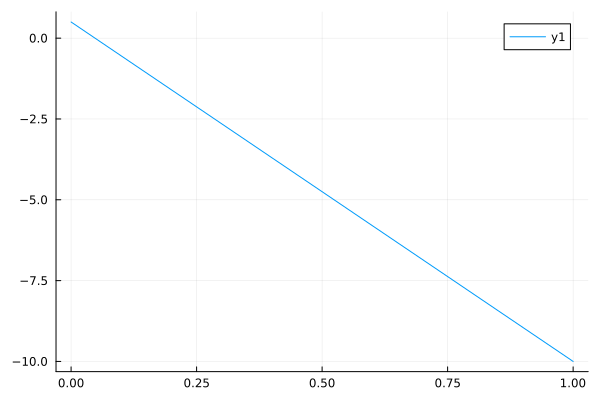

In [13]:
# Lerp a single value 

x = 0:0.05:1
f = lerp(x, 0.5, -10)
plot(x, f.(x))

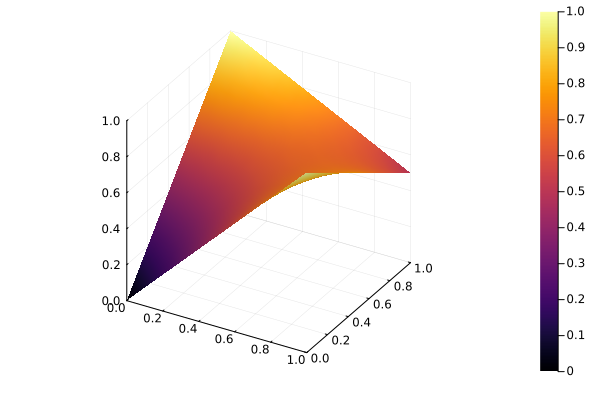

In [76]:
# Bilinear interpolation for four grid points

# f(0,0) = u0
# f(0,1) = u1
# f(1,0) = u2
# f(1,1) = u3
bilerp(u0, u1, u2, u3) = f(x, y) = (u3+u0-u1-u2)*x*y + (u1-u0)*y + (u2-u0)*x + u0

f = bilerp(0, 1, 1, 0.5)

x = 0:0.05:1
y = 0:0.05:1

surface(x, y, f)

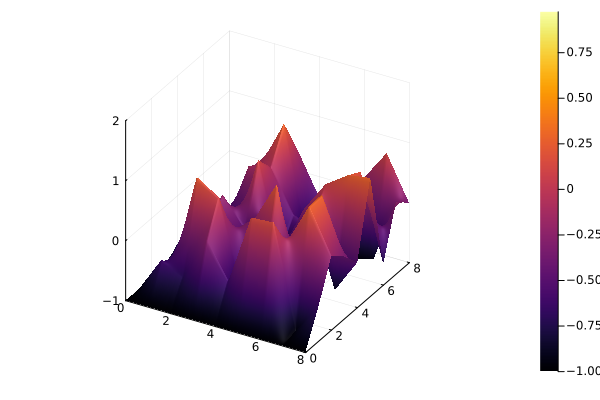

In [70]:
# Tiled Bilerp of some points

# Extract the fractional part of a number
function fract(x) 
    abs(x % 1)
end

# "Hash" some input numbers
function sillyhash(i, j)
    u = 20 * fract(i / sqrt(2))
    v = 33 * fract(j / sqrt(2))
    2*fract(u*v*(u+v)) - 1
end

function lerpnoise(x, y) 
    i = trunc(x)
    j = trunc(y)
    x = fract(x)
    y = fract(y)
    bilerp(
        sillyhash(i+0,j+0),
        sillyhash(i+0,j+1),
        sillyhash(i+1,j+0),
        sillyhash(i+1,j+1)
    )(x, y) 
end

x = 0:0.05:8
y = x
surface(x, y, lerpnoise, zlim=(-1, 2))


1

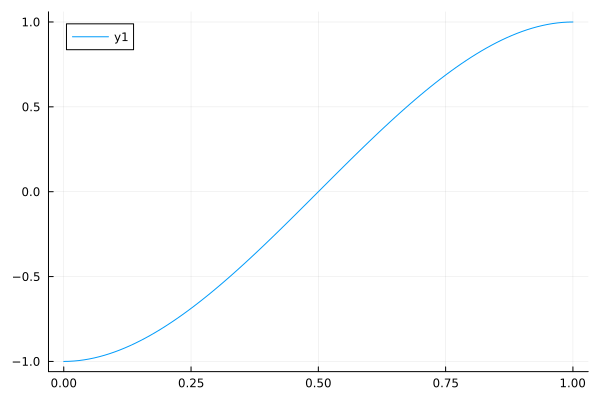

In [93]:
# f(0) = a
# f(1) = b
# f'(0) = 0, f'(1) = 0
cubic(a, b) = (x) -> a + 3(b-a)x^2 + 2(a-b)x^3

f = cubic(-1, 1)

x = 0:0.01:1
print(f(1))

plot(x, f)

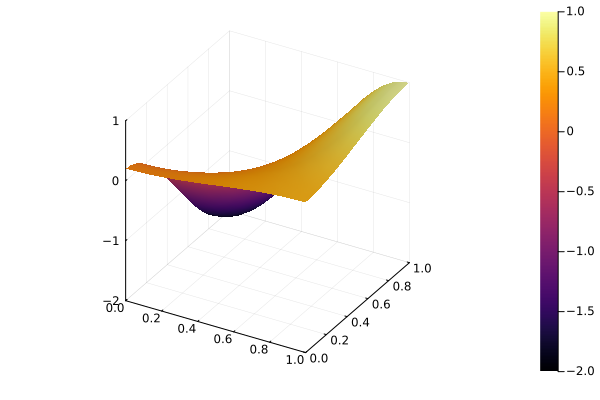

In [125]:
# Bicubic interpolation for four grid points

cube = (x, a, b) -> a + 3*(b-a)*x^2 - 2*(b-a)*x^3

# f(0,0) = u0
# f(0,1) = u1
# f(1,0) = u2
# f(1,1) = u3
function bicubic(u0, u1, u2, u3) 
    return (x, y) -> cube(
        y,
        cube(x, u0, u2),
        cube(x, u1, u3)
    )
end

function bicubic2(x, y, u0, u1, u2, u3) 
    p = u1 - u0
    q = u3 - u1 - u2 + u0
    r = u2 - u0
    x2 = x^2
    x3 = x^3
    S = p + 3*q*x2 - 2*q*x3
    return u0 + 3*r*x2 - 2*r*x3 + 3*(y^2)*S - 2*(y^3)*S;
end
f = bicubic(-1, 1, -8, -1)
f2 = (x, y) -> bicubic2(x, y, 0.2, -2, 0.5, 1)

x = 0:0.05:1
y = 0:0.05:1

surface(x, y, f2)

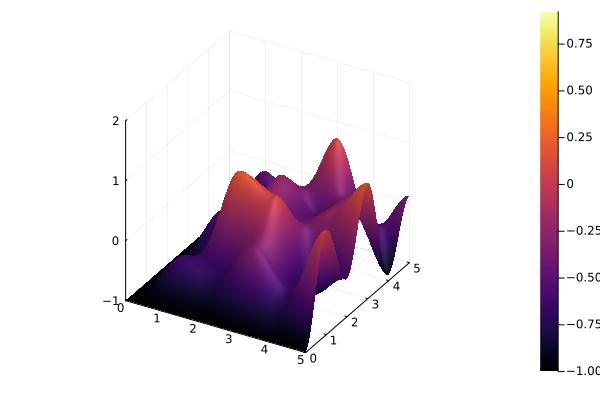

In [132]:
# Extract the fractional part of a number
function fract(x) 
    abs(x % 1)
end

# "Hash" some input numbers
function sillyhash(i, j)
    u = 20 * fract(i / sqrt(2))
    v = 33 * fract(j / sqrt(2))
    2*fract(u*v*(u+v)) - 1
end


function bicnoise(x, y) 
    i = trunc(x)
    j = trunc(y)
    x = fract(x)
    y = fract(y)
    bicubic2(
        x, y,
        sillyhash(i+0,j+0),
        sillyhash(i+0,j+1),
        sillyhash(i+1,j+0),
        sillyhash(i+1,j+1)
    )
end

x = 0:0.05:5
y = x
surface(x, y, bicnoise, zlim=(-1, 2))